In [1]:
import numpy as np
from pathlib import Path
import os 

# stored SHAP values from 21 repetitions
output_shap = Path('/wrk-vakka/group/lmu/projects/n_track_ML/output/shap/shap_all_20230126/202301261632')
os.listdir(output_shap)

['273025026',
 '273025014',
 '273025019',
 '273025013',
 '273025021',
 '273025025',
 '273025017',
 '273025022',
 '273025028',
 '273025012',
 '273025018',
 '273025020',
 '273025027',
 '273025015',
 '273025030',
 '273025011',
 '273025029',
 '273025023',
 '273025024',
 '273025016']

In [2]:
# each subdirectory contains lists with 4 cross-validation runs
os.listdir(output_shap / '273025026')

['features.npy',
 'list_idx_train.npy',
 'list_shap_deep.npy',
 'list_idx_test.npy',
 'list_shap_grad.npy',
 'list_X_test.npy',
 'list_accuracy.npy']

In [3]:
def load_shap_values(output_shap):
    list_idx_train = np.load(output_shap / 'list_idx_train.npy', allow_pickle=True)
    list_idx_test = np.load(output_shap / 'list_idx_test.npy', allow_pickle=True)
    list_X_test = np.load(output_shap / 'list_X_test.npy', allow_pickle=True)
    list_shap_deep = np.load(output_shap / 'list_shap_deep.npy', allow_pickle=True)
    list_shap_grad = np.load(output_shap / 'list_shap_grad.npy', allow_pickle=True)
    list_acc = np.load(output_shap / 'list_accuracy.npy', allow_pickle=True)
    features = np.load(output_shap / 'features.npy', allow_pickle=True)
    
    return list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features

In [4]:
list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_accuracy, features =\
load_shap_values(output_shap / '273025026')

print(list_accuracy.mean())
print(list_idx_test.shape)
print(list_idx_test[0].shape)
#print(list_idx_test[0])
print(list_shap_deep.shape)
print(list_shap_deep[0].shape)
#print(list_shap_deep[0][0])


0.5788612836438923
(4,)
(75,)
(4,)
(75, 28, 5)


In [5]:
# combine all repetitions
lists_idx_test = []
lists_X_test = []
lists_shap_deep = []
lists_shap_grad = []
lists_acc = []
for r in os.listdir(output_shap):
    output = output_shap / r
    
    list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features =\
    load_shap_values(output)

    lists_idx_test.extend(list_idx_test)
    lists_X_test.extend(list_X_test)
    lists_shap_deep.extend(list_shap_deep)
    lists_shap_grad.extend(list_shap_grad)
    lists_acc.append(list_acc)
    
    #print(r)
    #print(np.mean(list_acc))
    #print(list_acc.shape)
    
list_idx_test = np.concatenate(lists_idx_test)
list_X_test = np.concatenate(lists_X_test)
list_shap_deep = np.concatenate(lists_shap_deep)
list_shap_grad = np.concatenate(lists_shap_grad)

list_acc = np.concatenate(lists_acc)
print(list_acc.shape)
print(np.mean(list_acc))


(80,)
0.5598863314525581


In [6]:
print(list_idx_test.shape)
print(list_X_test.shape)
print(list_shap_deep.shape)
print(list_shap_grad.shape)


(5780,)
(5780, 28, 5)
(5780, 28, 5)
(5780, 28, 5)


In [7]:
list_idx_test

array([  2,   3,   6, ..., 283, 285, 287])

In [8]:
unique, counts = np.unique(list_idx_test, return_counts=True)
print(len(unique))
print(min(unique))
counts

289
0


array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [9]:
list_shap_deep[:,0,0]

array([ 4.14481956e-03, -4.44333239e-04,  5.18488433e-05, ...,
        4.59189040e-03,  1.78006898e-03,  2.22364902e-03])

In [10]:
# pick repetitions of a single instance (time series)
idx_1 = list_idx_test==1
shap_1 = list_shap_deep[idx_1] 
print(shap_1.shape)

# average over repetitions and timepoint (leaves features)
np.mean(shap_1, axis=(0,1))

(20, 28, 5)


array([0.00730401, 0.00145479, 0.00030455, 0.00264901, 0.00072726])

In [11]:
X_test_f = []
shap_deep_f = []
shap_grad_f = []
# loop over instances
for i in range(len(unique)):
    #print(i)
    idx_i = list_idx_test==i
    X_test_i = list_X_test[idx_i]
    shap_deep_i = list_shap_deep[idx_i]
    shap_grad_i = list_shap_grad[idx_i]
    # average over repetitions and time steps
    X_test_f.append(np.mean(X_test_i, axis=(0,1)))
    shap_deep_f.append(np.mean(shap_deep_i, axis=(0,1)))
    shap_grad_f.append(np.mean(shap_grad_i, axis=(0,1)))
    
X_test_f = np.array(X_test_f)
shap_deep_f = np.array(shap_deep_f)
shap_grad_f = np.array(shap_grad_f)

#X_test_f = np.concatenate(X_test_f, axis=0)
#shap_deep_f = np.concatenate(shap_deep_f, axis=0)
#shap_grad_f = np.concatenate(shap_grad_f, axis=0)

print(X_test_f.shape)
print(shap_deep_f.shape)
print(shap_grad_f.shape)


(289, 5)
(289, 5)
(289, 5)


In [12]:
X_test_f[:5]

array([[ 3.29735421, -0.40285843,  0.37986782, -1.31298762, -0.01801084],
       [ 2.4056834 , -0.40285843,  0.37986782,  0.56680738,  0.02634482],
       [ 1.01445079,  1.1893616 ,  0.67543299,  2.82424499, -0.01223573],
       [ 0.61414527,  1.1893616 ,  0.67543299,  2.565495  ,  0.04620283],
       [ 0.05080218, -0.54906938, -0.67503596, -0.94505606,  0.00824944]])

In [13]:
shap_deep_f[:5]

array([[ 3.29990475e-02, -1.81313064e-02, -8.97028214e-03,
        -1.43433665e-02,  9.25982997e-03],
       [ 7.30401335e-03,  1.45478941e-03,  3.04553096e-04,
         2.64900817e-03,  7.27261626e-04],
       [ 1.64406938e-03, -1.84886893e-01, -2.22423443e-02,
         1.35861013e-01,  7.62327445e-02],
       [-2.77516909e-03, -3.13815053e-04,  2.55077512e-03,
         4.12782461e-03, -1.75862955e-05],
       [ 1.73923705e-04, -8.28956417e-05, -1.44088550e-03,
        -4.92042930e-04, -1.52895543e-03]])

In [14]:
import pandas as pd
import shap

from load_data_tsc import fsets

features = fsets['all'][2:]
print(features)

/proj/group/lmu/software/Miniconda3/py38_4.12.0/envs/tsc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-h1yjacmk because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


sklearn 1.1.1
sktime 0.10.1
['D', 'A', 'P', 'Dist', 'dt']


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


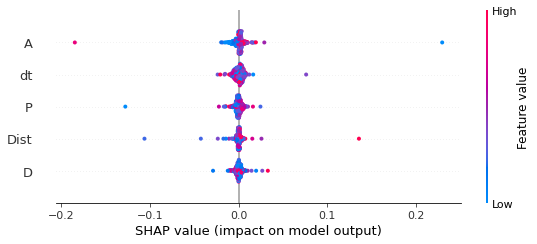

In [15]:
X_test_f = pd.DataFrame(X_test_f, columns=features)

shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer')


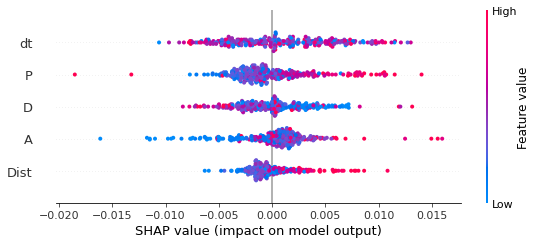

In [16]:
shap.summary_plot(shap_grad_f, features=X_test_f, title='GradientExplainer')

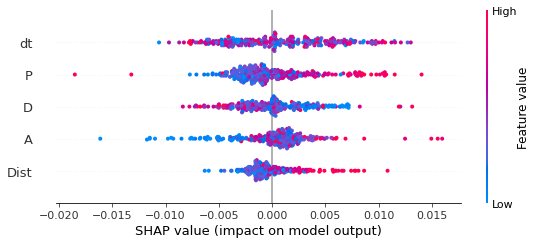

In [17]:
large = np.absolute(shap_grad_f) > 0.05
shap_grad_f_trim = shap_grad_f.copy()
shap_grad_f_trim[large] = 0
shap.summary_plot(shap_grad_f_trim, features=X_test_f, title='DeepExplainer without outliers')